# Lesson3: final part

[Lesson 3](https://github.com/BCDA-APS/use_bluesky/blob/master/notebooks/lesson3.ipynb) demonstrated how bluesky wcan show data as it is acquired.  This notebook provides a concise summary, which should be a good general starting point for users.

In [1]:
%matplotlib notebook
from bluesky.utils import install_nb_kicker
install_nb_kicker()

from ophyd import EpicsMotor
from ophyd.scaler import ScalerCH
from bluesky import RunEngine
import bluesky.plans as bp
from bluesky.callbacks.best_effort import BestEffortCallback
from apstools.devices import use_EPICS_scaler_channels

In [2]:
RE = RunEngine({})
RE.subscribe(BestEffortCallback())

P = "xxx:"     # use your IOC's PV prefix here

m1 = EpicsMotor(f"{P}m1", name="m1")
scaler = ScalerCH(f"{P}scaler1", name="scaler")
scaler.select_channels(None)

Count the detector (5 times)

Transient Scan ID: 1     Time: 2019-03-10 19:40:34
Persistent Unique Scan ID: '99fefc79-4d01-4713-aa66-1624c396060f'
New stream: 'primary'
+-----------+------------+------------+------------+------------+
|   seq_num |       time |      clock |         I0 |      scint |
+-----------+------------+------------+------------+------------+


<IPython.core.display.Javascript object>


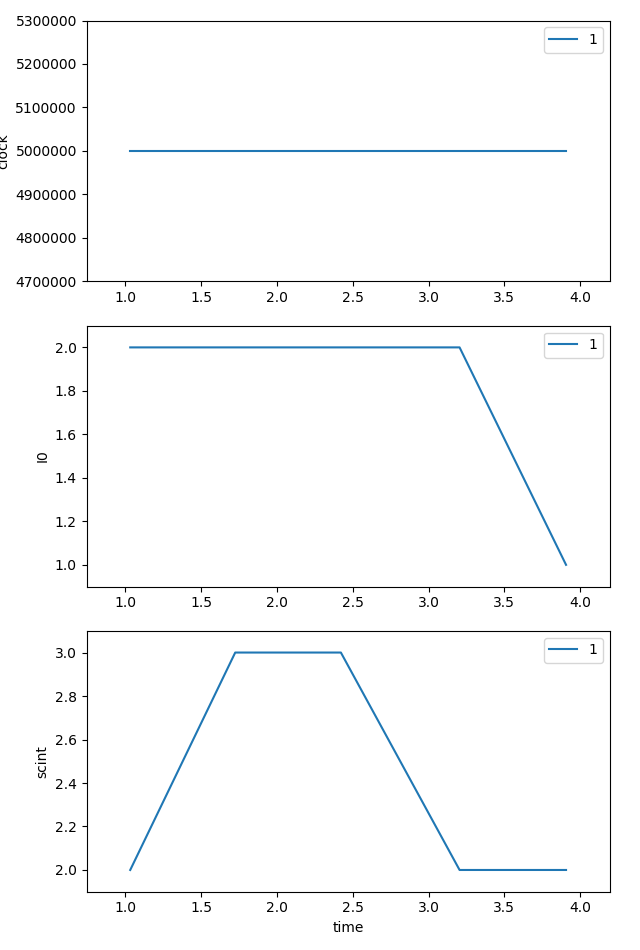

|         1 | 19:40:35.1 |    5000000 |          2 |          2 |
|         2 | 19:40:35.8 |    5000000 |          2 |          3 |
|         3 | 19:40:36.5 |    5000000 |          2 |          3 |
|         4 | 19:40:37.2 |    5000000 |          2 |          2 |
|         5 | 19:40:38.0 |    5000000 |          1 |          2 |
+-----------+------------+------------+------------+------------+
generator count ['99fefc79'] (scan num: 1)





('99fefc79-4d01-4713-aa66-1624c396060f',)

In [3]:
RE(bp.count([scaler], num=5))

Scan the scaler *vs.* the motor with 5 data points.

Transient Scan ID: 2     Time: 2019-03-10 19:44:39
Persistent Unique Scan ID: 'a7595f06-e4aa-4411-a51a-4bb52949d733'
New stream: 'primary'
+-----------+------------+------------+------------+------------+------------+
|   seq_num |       time |         m1 |      clock |         I0 |      scint |
+-----------+------------+------------+------------+------------+------------+


<IPython.core.display.Javascript object>


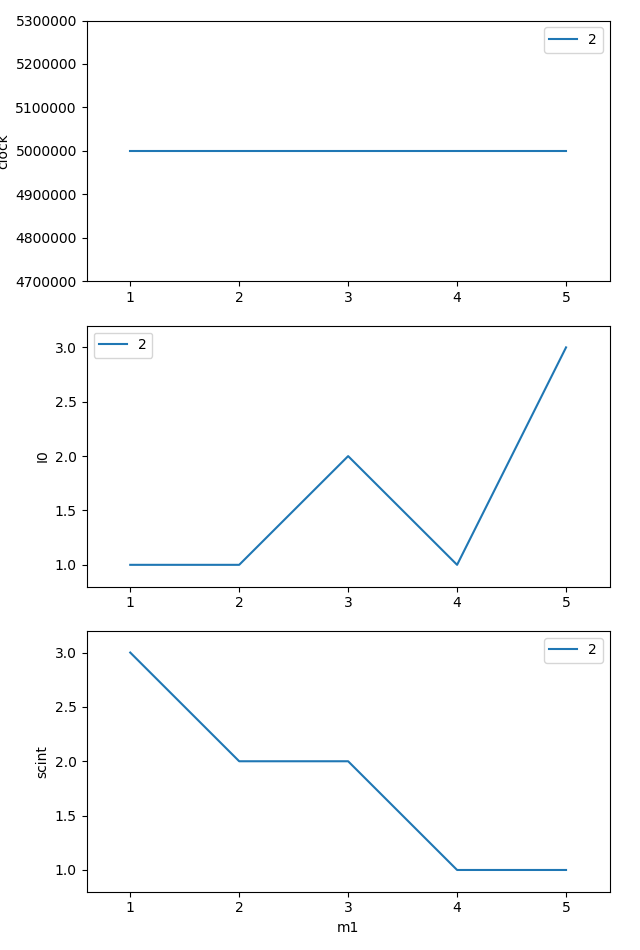

|         1 | 19:44:44.9 |    1.00000 |    5000000 |          1 |          3 |
|         2 | 19:44:47.1 |    2.00000 |    5000000 |          1 |          2 |
|         3 | 19:44:48.9 |    3.00000 |    5000000 |          2 |          2 |
|         4 | 19:44:51.0 |    4.00000 |    5000000 |          1 |          1 |
|         5 | 19:44:53.1 |    5.00000 |    5000000 |          3 |          1 |
+-----------+------------+------------+------------+------------+------------+
generator scan ['a7595f06'] (scan num: 2)





('a7595f06-e4aa-4411-a51a-4bb52949d733',)

In [4]:
RE(bp.scan([scaler], m1, 1, 5, 5))